#Product Sales Prediction


building a model that will help to predict the customer  segment that should be target with the  marketing campaign

My choice for Logistic Regression is becuase Logistics regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable.
In logistic regression, the dependent variable is usually a  binary variable that contains data coded as one and Zero, where 1 represents  (yes, success, etc.) and  0 represent (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

Logistic Regression Assumptions
Binary logistic regression requires the target variable or dependent variable to be binary and binary logistics regression requires  ordinal variable.
For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
Only the meaningful variables should be included.
The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
The independent variables are linearly related to the log odds.
Logistic regression requires quite large sample sizes.
with this above assuption in mind let usn consider our data set.


Reference:https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
          https://www.statisticssolutions.com/assumptions-of-logistic-regression/


In [93]:
#importing the essentials libraries for data manupulation
import numpy as np
import pandas as pd
#Importing the visualisation libraries
 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [95]:
#import the library for our data path
import os
os.getcwd()

'C:\\Users\\PMIKE\\Downloads'

In [96]:
#Reading of dataset with pandas using the semi colon seperator         
bank =pd.read_csv('bank-full.csv', sep =";")
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [97]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [98]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [99]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [100]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")



In [101]:
# performing exploration on the target variables
bank["y"].value_counts()


no     39922
yes     5289
Name: y, dtype: int64

In [102]:
bank.shape

(45211, 17)

# Performing Exploratory Data Analysis

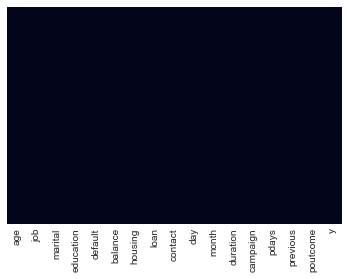

In [103]:
sns.heatmap(bank.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.heatmap(bank.isnull(),yticklabels=False,cbar=False)

#The Dataframe contains  no null value hence no missing data

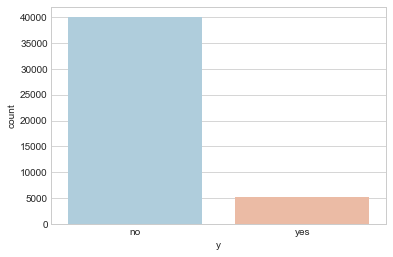

In [104]:
#Runing EDA on the target variable
#style : dict, None, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured set
sns.set_style('whitegrid')

#Show the counts of observations in each categorical bin using bars.
#A count plot can be thought of as a histogram across a categorical, instead
#of quantitative, variable.

#palette : palette name, list, or dict, optional
sns.countplot(x='y',data=bank,palette='RdBu_r')

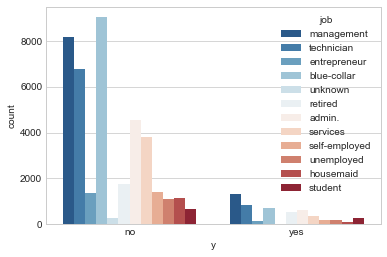

In [105]:
sns.set_style('whitegrid')
sns.countplot(x='y',hue='job',data=bank,palette='RdBu_r')

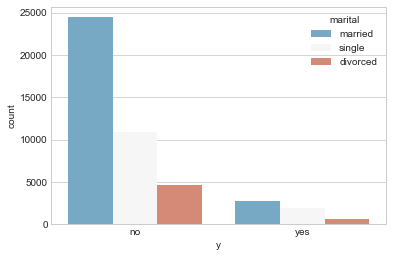

In [106]:
sns.set_style('whitegrid')
sns.countplot(x='y',hue='marital',data=bank,palette='RdBu_r')

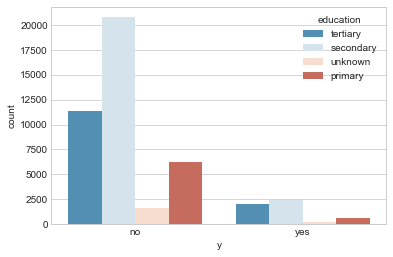

In [107]:
sns.set_style('whitegrid')
sns.countplot(x='y',hue='education',data=bank,palette='RdBu_r')

In [108]:
# Exploration of Variable to have insight
bank.groupby('y').count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
y,,,,,,,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


In [109]:
bank.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


Observation:
 The average age of customers who subscriped  is higher than that of the customers who didn’t.
The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.
We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.



In [110]:
bank.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,45.865567,1250.949934,15.421398,255.933002,2.834331,36.081740,0.489272
secondary,39.964270,1154.880786,15.759159,258.685760,2.700802,42.353504,0.567753
tertiary,39.593640,1758.416435,16.086535,258.518532,2.825577,39.024134,0.661980
unknown,44.510501,1526.754443,15.810985,257.313947,2.849219,36.856220,0.488422


In [111]:
bank.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,45.782984,1178.872287,15.796428,262.517188,2.630882,41.001728,0.551373
married,43.408099,1425.925590,15.854487,253.412765,2.842875,37.950467,0.556552
single,33.703440,1301.497654,15.708210,266.497967,2.649805,44.652385,0.642690


In [112]:
bank.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092


#Further Visualisation

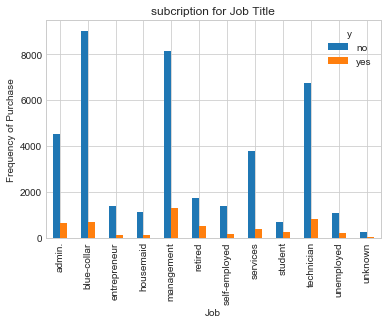

In [113]:
pd.crosstab(bank.job,bank.y).plot(kind='bar')
plt.title('subcription for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('subcription_fre_job')

In [ ]:
# Although Those in the management category formed the highest number subscribers, with a frequency of about 140. Therefore, the marketing team should focus on retired category beacause of the low number of non-subscrbers, and relative high number of subcribers categories for campaings and they should focus less those in blue-collar because of high number non subcribers
#Job might be a good predictor of clients subcribers

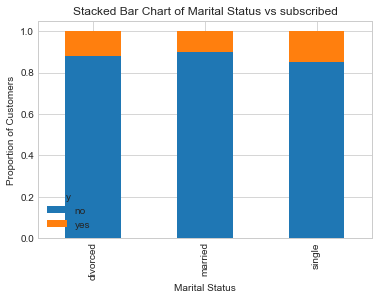

In [84]:
table=pd.crosstab(bank.marital,bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs subscribed')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_subscribed')

In [ ]:
# Those who are single form the category of the highest subcribers Although might not be a good predictor of clients subcribers

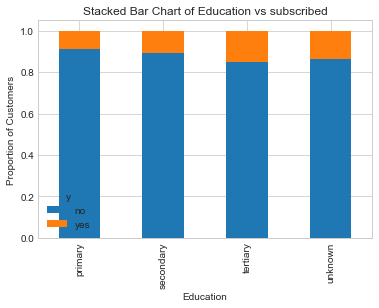

In [114]:
table=pd.crosstab(bank.education,bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs subscribed')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_subscribed')

In [ ]:
# Those who are single form the category of the highest subcribers.

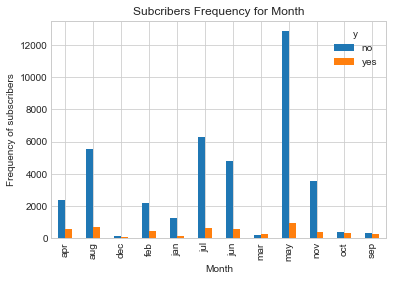

In [115]:
pd.crosstab(bank.month,bank.y).plot(kind='bar')
plt.title('Subcribers Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of subscribers')
plt.savefig('pur_fre_month_bar')

In [ ]:
#Month might be a good predictors

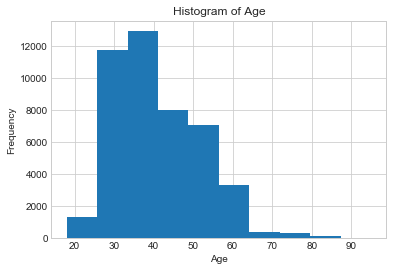

In [117]:
bank.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [ ]:
# Most of the clients in the data set are between the age 30-40

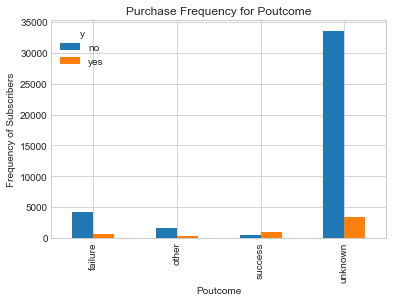

In [118]:
pd.crosstab(bank.poutcome,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Subscribers')
plt.savefig('pur_fre_pout_bar')

In [ ]:
# poutcomeAppears to be a good predictors

In [15]:
# examine first values in all object columns
bank_category = bank
assert bank_category.shape == bank.shape

object_columns = bank_category.select_dtypes(include=['object'])
print(object_columns.iloc[0])

job          management
marital         married
education      tertiary
default              no
housing             yes
loan                 no
contact         unknown
month               may
poutcome        unknown
y                    no
Name: 0, dtype: object


In [39]:
nominal_cols = [
"job",
"marital",
"education",
"default",
"housing",
"loan",
"contact",
"month",
"poutcome",
]
# view unique categories for each selected variable
print("Unique categories for each selected variable \n")
for name in nominal_cols:
    print(name,':')
    print(bank[name].value_counts(),'\n')

Unique categories for each selected variable 

job :
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

marital :
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

education :
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

default :
no     44396
yes      815
Name: default, dtype: int64 

housing :
yes    25130
no     20081
Name: housing, dtype: int64 

loan :
no     37967
yes     7244
Name: loan, dtype: int64 

contact :
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

month :
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec

In [40]:
# creating dummies variable with categorical features
one_hot_data = pd.get_dummies(bank[nominal_cols])

# join dummie variables with original dataframe
one_hot_data = pd.concat([one_hot_data, bank], axis=1)

## drop the original variables that were encoded
one_hot_data = one_hot_data.drop(nominal_cols, axis=1)

one_hot_data.head()


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,y
0,0,0,0,0,1,0,0,0,0,0,...,0,1,58,2143,5,261,1,-1,0,no
1,0,0,0,0,0,0,0,0,0,1,...,0,1,44,29,5,151,1,-1,0,no
2,0,0,1,0,0,0,0,0,0,0,...,0,1,33,2,5,76,1,-1,0,no
3,0,1,0,0,0,0,0,0,0,0,...,0,1,47,1506,5,92,1,-1,0,no
4,0,0,0,0,0,0,0,0,0,0,...,0,1,33,1,5,198,1,-1,0,no


In [71]:
#create dummy variables for the target variable
y=pd.get_dummies(bank['y']).values

In [72]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [1, 0]], dtype=uint8)

In [73]:
bank_data = one_hot_data

# ensure data fidelity
assert bank_data.shape == one_hot_data.shape


In [74]:
#Defining of variables
X = bank_data.loc[:, bank_data.columns != 'y']
y = bank_data.loc[:, bank_data.columns == 'y']

In [75]:
X.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,58,2143,5,261,1,-1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,44,29,5,151,1,-1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,33,2,5,76,1,-1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,47,1506,5,92,1,-1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,33,1,5,198,1,-1,0


#Building a Logistic Regression model

Let's start by splitting our data into a training set and test set 


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\PMIKE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


#Predicting the test set results and calculating the accuracy

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[11703   295]
 [ 1055   511]]


The result is telling us that we have 11703 + 295 correct predictions and 1055+511 incorrect predictions.

#Compute precision, recall, F-measure and support
To quote from Scikit Learn:

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

         no       0.92      0.98      0.95     11998
        yes       0.63      0.33      0.43      1566

avg / total       0.88      0.90      0.89     13564



In [ ]:
##Of the entire test set, 89% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 89% of the customer’s preferred term deposits that were promoted.

In [ ]:
# calculate roc curve
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(test_y_resampled_mlp, tuned_mlp_probabilities_positive)

# plot a straight line
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr_mlp, tpr_mlp, marker='.')

plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC curve of positive probalities of Logistics');

# show the plot
plt.show()

In [ ]:
Conclusive Report
Model Comparison:

    The Logistics Regresssion model (with selected features) has a recall of 0.90 on the Clients. 